# <span style="color:IndianRed">TP 2: Expectation-Maximisation algorithm – Importance sampling </span>

Anne Gagneux

# <span style="color:Gray">Exercice 1 Discrete distributions</span>

### <span style="color:navy">Question 1</span>

On va utiliser la méthode d'inversion de la fonction de répartition.

On a, pour $y \in \mathbb R$:

$$ F(y) = \mathbb P(X\leq y) = \sum_{i: x_i\leq y} \mathbb P (X=x_i) = \sum_{i: x_i\leq y} p_i$$

On utilise ensuite la définition de l'inverse de la fonction de répartition:

$$ F^{-1}(u) = \inf \{ y\in \mathbb R \text{ tq } F(y)\geq u \} $$
$$ = \inf \{ y\in \mathbb R \text{ tq } \sum_{i: x_i\leq y} p_i \geq u $$
$$ = x_i \text{ tq } \sum_{j=1}^{i-1} p_j < u \text{ et } \sum_{j=1}^{i} p_j \geq u$$

On sait échantillonner suivant $ U \sim \mathcal U ([0,1])$.

On a que $X = F^{-1}(U)$ suit la loi de densité associée à la fonction de répartition $F$.

### <span style="color:navy">Question 2</span>

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def sim(x,p):
    u = np.random.rand()
    c = p.cumsum()
    k = (c>u).argmax()
    return x[k]

In [8]:
n=10
p=np.random.rand(n)
p/=p.sum()
x=np.linspace(0,5*n,n)

In [9]:
sim(x,p)

50.0

### <span style="color:navy">Question 3</span>

In [10]:
N = 20000
xi = []
for i in range(N):
    xi.append(sim(x,p))
xi_histo = np.histogram(xi,bins=n)

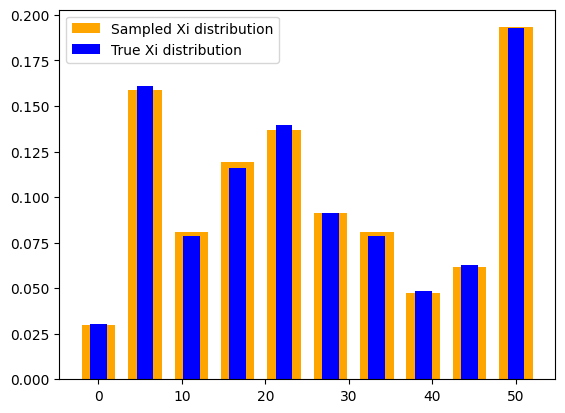

In [11]:
plt.bar(x,xi_histo[0]/N,color = "orange",width=4)
plt.bar(x,p, color="b",width = 2)
plt.legend(["Sampled Xi distribution","True Xi distribution"])
plt.show()

# <span style="color:Gray">Exercice 2 Gaussian mixture model and the EM algorithm</span>

### <span style="color:navy">Question 1</span>

$$ \theta = (\alpha_j,\mu_j,\Sigma_j)_{j \in[1,m]} $$

$$ \mathcal{L}(x_1,x_2,\dots,x_n;\theta) =  \prod_{i=1}^n f_\theta(x_i) $$
$$ = \prod_{i=1}^n \sum_{j=1}^m \alpha_j \times \frac{1}{\sqrt{(2\pi)^d |\Sigma_j|}} \exp \left(-\frac{1}{2} (x-\mu_j)^T \Sigma^{-1}_j (x-\mu_j)\right)$$

### <span style="color:navy">Question 2</span>

In [12]:
mu = [20,10]
sigma = [3,0.3]
pi = np.array([0.4,0.6])
x = [0,1]

In [13]:
N = 1000
xi = []
for i in range(N):
    gauss = sim(x,pi)
    xi.append( np.random.normal( mu[gauss], sigma[gauss]))

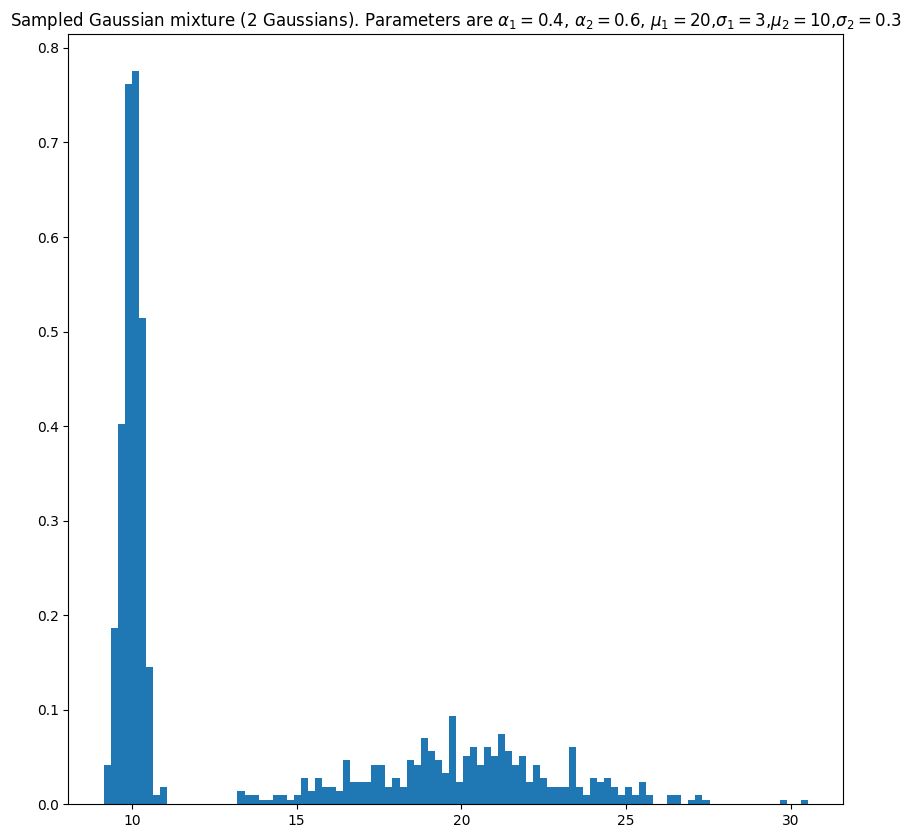

In [14]:
plt.figure(figsize=(10,10))
plt.hist(xi, bins =100,density=True)
plt.title(r"Sampled Gaussian mixture (2 Gaussians). Parameters are $\alpha_1=${}, $\alpha_2=${}, $\mu_1=${},$\sigma_1=${},$\mu_2=${},$\sigma_2=${}".format(pi[0],pi[1],mu[0],sigma[0],mu[1],sigma[1]))
plt.show()

### <span style="color:navy">Question 3</span>

$$ \theta = (\alpha_1, \dots, \alpha_m, \mu_1, \dots , \mu_m, \Sigma_1, \dots, \Sigma_m) $$

##### Estimation step

$$ Q(\theta, \theta_t) = C + \sum_{i=1}^n \sum_{j=1}^m p(z_i=j | x_i; \theta_t) \cdot \left(\log \alpha_j -  \log \det{\Sigma_j} - \frac{1}{2} (x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j)\right) $$ 

$$ p(z_i=j | x_i; \theta_t) = \frac{ p(x_i | z_i=j ; \theta_t) p( z_i=j ; \theta_t)}{p(x_i;\theta_t)} $$

$$ p(z_i=j | x_i; \theta_t) = \frac{ f_{gauss(\mu_j,\Sigma_j)}(x_i) \cdot \alpha_j }{\sum_j f_{gauss(\mu_j,\Sigma_j)}(x_i) \cdot \alpha_j } $$



##### Maximisation step

On a la contrainte $\sum_j \alpha_j = 1$ qu'on peut rajouter sous la forme d'un Lagrangien à $Q(\theta,\theta_t)$.

On a alors $F(\theta, \theta_t) = C + \sum_{i=1}^n \sum_{j=1}^m p(z_i=j | x_i; \theta_t) \cdot \left(\log \alpha_j -  \log \det \Sigma_j - \frac{1}{2} (x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j)\right) + \lambda (1-\sum_{j=1}^m \alpha_j) $ 


$$ \frac{\delta F}{\delta \alpha_j} = 0 $$

$$ \iff \sum_{i=1}^n \frac{p(z_i=j | x_i; \theta_t)}{\alpha_j} - \lambda   = 0 $$

$$ \iff \alpha_j = \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t)}{\lambda} $$

Et $\sum_j \alpha_j = 1 \iff \lambda = \sum_j \sum_{i=1}^n p(z_i=j | x_i; \theta_t)$ 

$\iff  \lambda = \sum_i \left(\sum_j p(z_i=j | x_i; \theta_t)\right) = \sum_i 1 = n  $

D'où, $$\alpha_j =  \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t)}{n}  $$


$$ \frac{\delta Q}{\delta \mu_j} = 0 $$

$$ \iff - \sum_{i=1}^n p(z_i=j | x_i; \theta_t) \Sigma_j (x_i - \mu_j) = 0 $$ 

$$ \iff \mu_j = \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t) x_i}{\sum_{i=1}^n p(z_i=j | x_i; \theta_t) } $$ 

car $\Sigma_j \neq 0$

Pour calculer la différentielle de $Q$ par rapport à $\Sigma_j$, on a besoin des résultats suivants:

$$ \frac{\delta \log \det A}{\delta A} = A^{−T}$$

et $$ \frac{\delta x^TAx}{\delta A} = \frac{\delta Tr(Ax x^T)}{\delta A} = xx^T $$

$$ \frac{\delta Q}{\delta \Sigma_j^{-1}} = 0 $$

$$ \iff \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) \cdot \left( \Sigma_j^{T} - (x_i-\mu_j) (x_i-\mu_j)^T \right) = 0 $$

$$\iff - \Sigma_j \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) = \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) (x_i-\mu_j)(x_i-\mu_j)^T $$

$$\iff \Sigma_j = \frac{ \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) (x_i-\mu_j) (x_i-\mu_j)^T}{\sum_{i=1}^n  p(z_i=j | x_i; \theta_t) } $$

### <span style="color:navy">Question 4</span>

In [52]:
class EM_algorithm:

    def __init__(self, nb_clusters=2, max_steps=10):
        self.nb_clusters = nb_clusters
        self.max_steps = max_steps

    def init_parameters(self, x):
        alpha = 0.1 + np.random.rand(self.nb_clusters)
        self.alpha = alpha / alpha.sum()
        self.mu = x.mean(axis=0) + x.std(axis=0) * np.random.rand(self.nb_clusters,self.d)
        self.sigma = [np.diag(1 + np.random.rand(self.d) ) for i in range(self.nb_clusters)]

    def gaussian_density(self, x, i, j):
        normalisation = 1 / np.sqrt((2 * np.pi) ** self.d * np.linalg.det(self.sigma[j]))
        return normalisation * np.exp(
            - 0.5 * (x[i, :] - self.mu[j]).T[None,:] @ (np.linalg.inv(self.sigma[j]) @ (x[i, :] - self.mu[j]))[:,None])

    def estimation_step(self, x):
        self.probas = np.zeros((self.n, self.nb_clusters))
        for i in range(self.n):
            for j in range(self.nb_clusters):
                self.probas[i, j] = self.alpha[j] * self.gaussian_density(x, i, j)
               
            self.probas[i,:] /= self.probas[i,:].sum()

    def maximisation_step(self, x):
        self.alpha = self.probas.sum(axis=0) / self.n
        self.mu = (self.probas.T @ x)/ self.probas.sum(axis=0)[:,None]
        for j in range(self.nb_clusters):
            self.sigma[j] = self.probas[0, j] * (((x[0, :] - self.mu[j]).T[:,None] @ (x[0, :] - self.mu[j])[None,:])).reshape((self.d,self.d)) / self.probas[:,
                                                                                                  j].sum()
    

            for i in range(1, self.n):
                self.sigma[j] += self.probas[i, j] * ((x[i, :] - self.mu[j]).T[:,None] @ (x[i, :] - self.mu[j])[None,:]).reshape((self.d,self.d)) / self.probas[:, j].sum()

    def train(self, x):
        self.d = x.shape[1]
        self.n = x.shape[0]
        self.init_parameters(x)

        for step in range(self.max_steps):
            self.estimation_step(x)
            self.maximisation_step(x)
            
    def free_parameters_gaussian(self,dimensions):
        return self.nb_clusters*dimensions + 0.5*(self.nb_clusters*dimensions*(dimensions+1)) + self.nb_clusters-1
      
    def BIC(self, x):
        likelihood = 0
        for i in range(self.n):
            partial_likelihood =0 
            for j in range(self.nb_clusters):
                partial_likelihood += self.alpha[j] * self.gaussian_density(x,i,j)
            likelihood += np.log(partial_likelihood)
        
        return -likelihood + 0.5 * self.free_parameters_gaussian(self.d)*np.log(self.n)

      
        
            

In [53]:
em = EM_algorithm(max_steps=500)
data = np.array(xi)[:,None]
em.train(data)

In [54]:
print(pi,em.alpha)

[0.4 0.6] [0.59260816 0.40739184]


In [55]:
print(mu,em.mu)

[20, 10] [[ 9.9996151 ]
 [20.17226395]]


In [56]:
print(sigma,em.sigma)

[3, 0.3] [array([[0.09403326]]), array([[8.94458624]])]


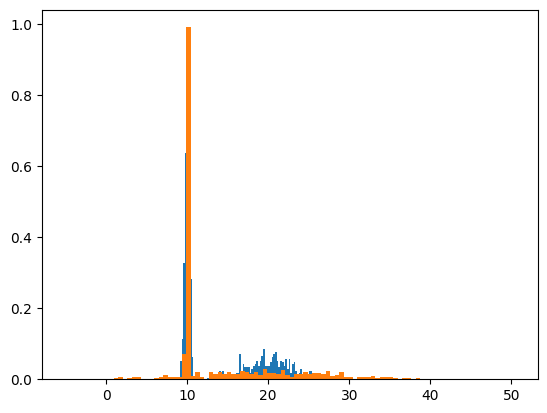

In [57]:
xi_em = []

for i in range(N):
    gauss_em = sim(x, em.alpha)
    xi_em.append(np.random.normal( em.mu[gauss_em][0], em.sigma[gauss_em][0][0]))
    

plt.hist(xi, bins =100,density=True)
plt.hist(xi_em, bins =100,density=True)
plt.show()

### <span style="color:navy">Question 5</span>

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('./data2/Crude-BirthDeath-Rate.csv')
df.head()
df.info()
data = df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Birth   194 non-null    float64
 1   Death   194 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


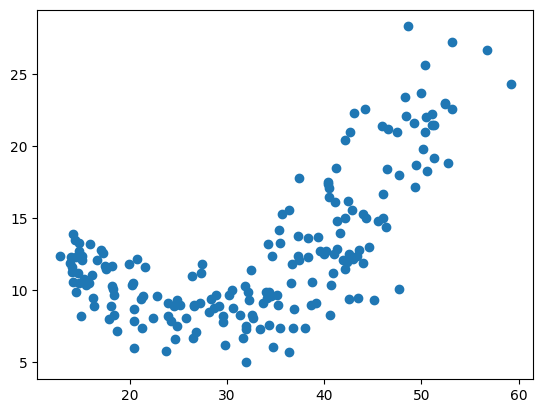

In [60]:
plt.scatter(data[:,0], data[:,1])
plt.show()

On observe visuellement deux régions en formes d'ellipse qui peuvent faire penser à des densités gaussiennes. Appliquer l'algorithme EM sur un mélange de gaussiennes semble donc être une idée pertinente. 

In [61]:
print(data.shape)

(194, 2)


In [62]:
em = EM_algorithm(nb_clusters=2, max_steps = 100)
em.train(data)

In [63]:
em.alpha

array([0.55161183, 0.44838817])

In [64]:
em.mu

array([[42.12233468, 14.9682036 ],
       [21.8580796 ,  9.78547606]])

In [65]:
em.sigma

[array([[40.97265704, 27.17930667],
        [27.17930667, 28.58540371]]),
 array([[40.50705139, -7.70154875],
        [-7.70154875,  3.90144635]])]

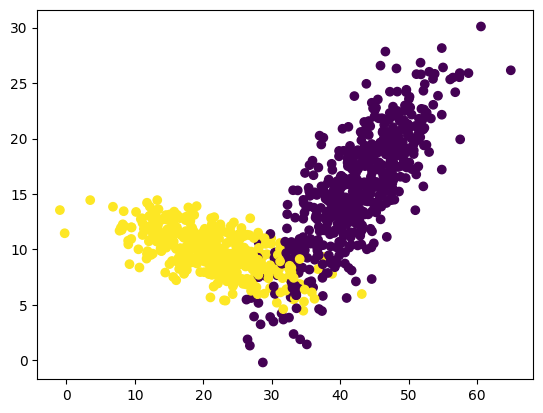

In [66]:
N = 1000
xi = np.zeros((N,3))
for i in range(N):
    gauss = sim(range(10),em.alpha)
    xi[i,:2] =  np.random.multivariate_normal(em.mu[gauss], em.sigma[gauss])
    xi[i,2] =  gauss
plt.scatter(xi[:,0],xi[:,1], c=xi[:,2])
plt.show()

### <span style="color:navy">Question 6</span>

Dans notre model, on peut exprimer $\mathbf{df}$, le nombre de degrés de libertés du modèle de mélange de gaussiennes avec $m$ clusters.

On a  $\theta = (\alpha_j, \mu_j, \Sigma_j)$.

Soit $d$ la dimension d'une observation telle que $X_i \mathbb{R}^d \forall i$: . 

- $(\alpha_j)_j$ a $m-1$ parameters car $\alpha_m$ complètement déterminé par la condition $\sum \alpha_j = 1$.

- $\mu_j \in \mathbb{R}^d$: il y a $m  \mu_j$ avec chacun $d$ paraùètres: on obtient $m*d$ paramètres en tout.

- $\Sigma_j \in \mathbb{R}^{d\times d}$ est symétrique donc a $\frac{d(d+1)}{2}$ paramètres.

On obtient finalement: 
$$ \mathbf{df} = (m-1) + m \times d + m \times \frac{d(d+1)}{2}$$

In [21]:
from scipy.stats import multivariate_normal

Pour trouver un bon candidat, sachant que l'algorithme EM est sensible à l'initialisation, on prend le meilleur candidat parmi 10 initialisations aléatoires.

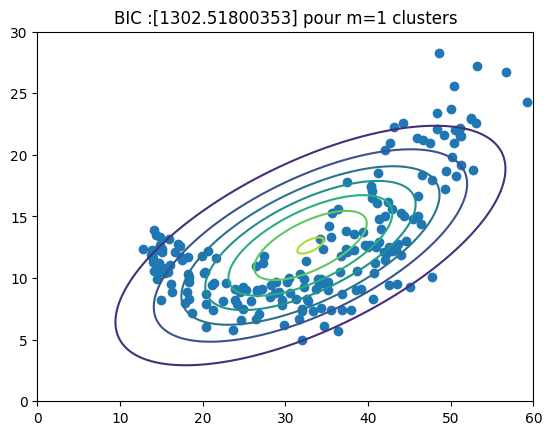

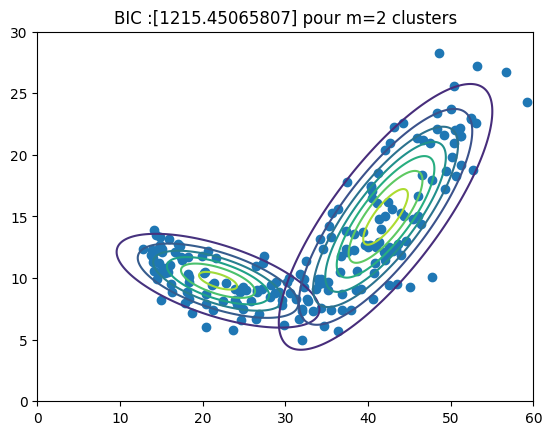

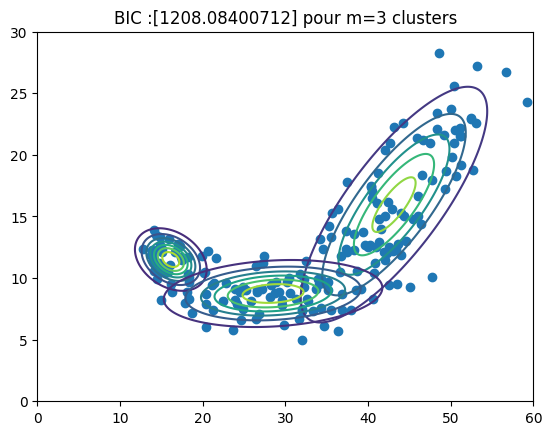

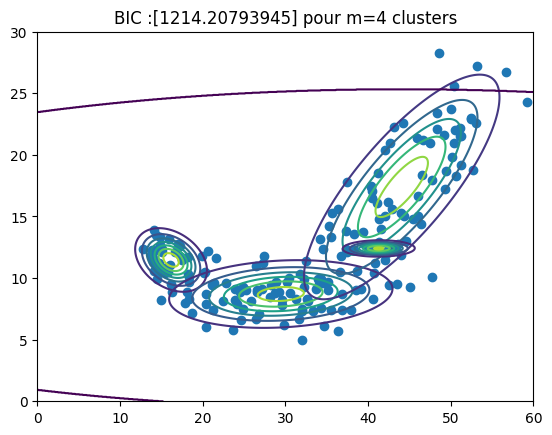

In [73]:
BIC = []
m_tests = [1,2,3,4]
for m in m_tests:
    ems = []
    bics = []
    for k in range(10):
        em = EM_algorithm(nb_clusters=m, max_steps = 1000)
        em.train(data)
        ems.append(em)
        bics.append(em.BIC(data))
    em = ems[np.array(bics).argmin()]
    BIC.append(em.BIC(data))
    plt.scatter(data[:,0], data[:,1])
    gaussians = [multivariate_normal(em.mu[j],em.sigma[j]) for j in range(m)]
    for j in range(m):
        x = np.linspace(0, 60, 1000).reshape((1000,1))
        y = np.linspace(0, 30, 1000).reshape((1000,1))
        X,Y = np.meshgrid(x,y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y
        z = gaussians[j].pdf(pos)
        plt.contour(X,Y,z)
        plt.title("BIC :{} pour m={} clusters".format(em.BIC(data)[0],m))
    plt.show()



Text(0.5, 1.0, 'Le nombre optimal de clusters est 3')

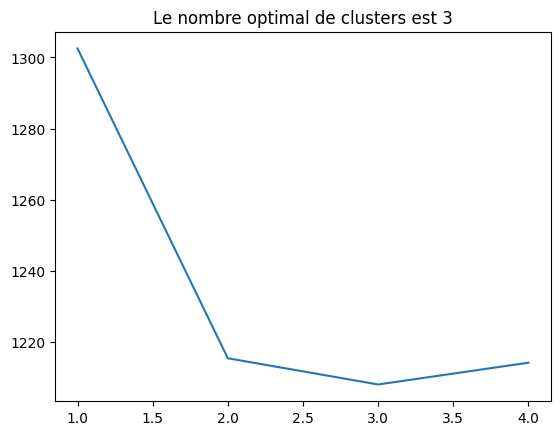

In [78]:
plt.plot(m_tests,BIC)
plt.title("Le nombre optimal de clusters est {}".format(m_tests[np.argmin(BIC)]))

# <span style="color:Gray">Exercice 3 Importance sampling</span> 

## 3.A – Poor Importance Sampling

### <span style="color:navy">Question 1</span>

In [75]:
def p_density(x):
    if x>=0:
        return x**(0.65) * np.exp(-x**2/2)
    else: 
        return 0

def q_density(x, mu = 0.8,sigma =1.5):
    normalisation = 1 / np.sqrt((2 * np.pi)*sigma**2)
    return normalisation * np.exp(- 0.5 * (x-mu)**2/(2*sigma**2))

def f_function(x):
    if x>=0:
        return 2* np.sin((np.pi*x)/1.5)
    else: 
        return 0
    
def compute_expectation(X, N=1000, function = f_function,pDensity = p_density,qDensity = q_density) :
    f_X = np.array(list(map(f_function, list(X)))) 
    w = np.array(list(map(p_density, list(X)))) / np.array(list(map(q_density, list(X))))
    w /= w.sum()
    expectation = (w*f_X).mean()
    deviation = (w*f_X).std()
    return expectation, deviation

### <span style="color:navy">Question 2</span>

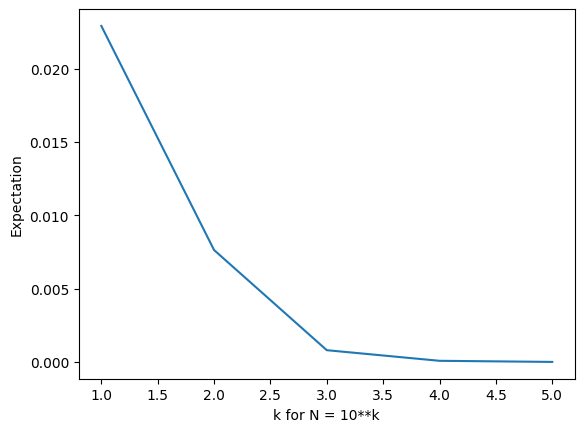

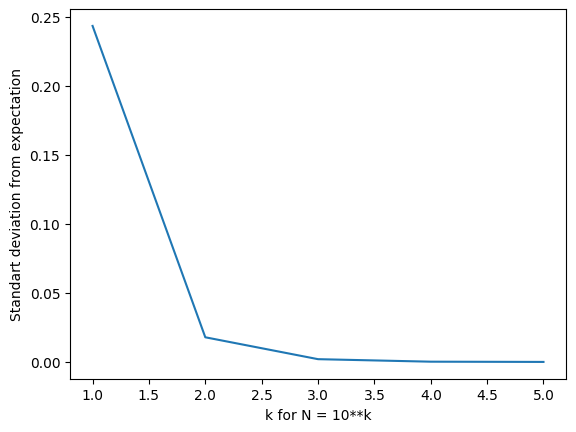

In [95]:
%matplotlib inline
N_tests = [10**k for k in range(1,6)]
expectations = []
deviations = []
for N in N_tests:
    e,s = compute_expectation(X = np.random.normal(loc = 0.8, scale = 1.5, size = N),N = N)
    expectations.append(e)
    deviations.append(s)
plt.plot(range(1,6),expectations )
plt.xlabel("k for N = 10**k")
plt.ylabel("Expectation")
plt.show()
plt.plot(range(1,6),deviations )
plt.xlabel("k for N = 10**k")
plt.ylabel("Standart deviation from expectation")
plt.show()

### <span style="color:navy">Question 3</span>

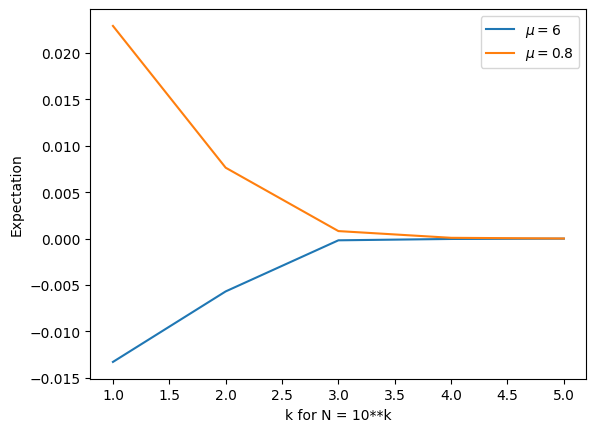

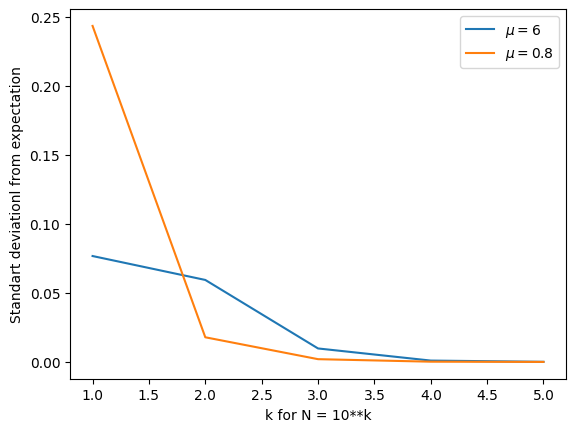

In [96]:
N_tests = [10**k for k in range(1,6)]
expectations2 = []
deviations2 = []
for N in N_tests:
    e,s = compute_expectation(X = np.random.normal(loc = 6, scale = 1.5, size = N), N=N , qDensity = lambda x : q_density(x, mu=6))
    expectations2.append(e)
    deviations2.append(s)
plt.plot(range(1,6),expectations2 ,label = r"$\mu=6$" )
plt.plot(range(1,6),expectations , label = r"$\mu=0.8$")
plt.xlabel("k for N = 10**k")
plt.ylabel("Expectation")
plt.legend()
plt.show()
plt.plot(range(1,6),deviations2,label = r"$\mu=6$" )
plt.plot(range(1,6),deviations, label = r"$\mu=0.8$")
plt.xlabel("k for N = 10**k")
plt.ylabel("Standart deviationl from expectation")
plt.legend()
plt.show()

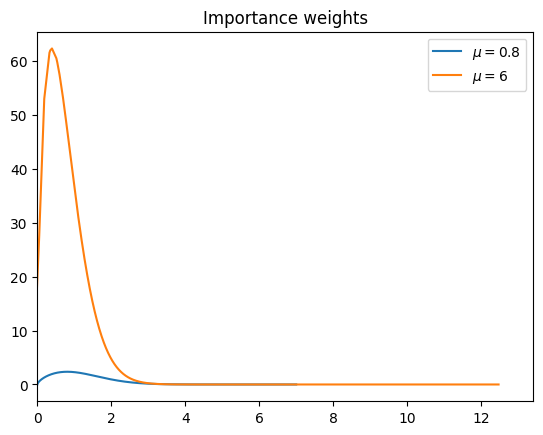

In [97]:
N = 100000
X = np.random.normal(loc = 0.8, scale = 1.5, size = N)
X = np.sort(X)
f_X = np.array(list(map(f_function, list(X)))) 
w_mu1 = np.array(list(map(p_density, list(X)))) / np.array(list(map(lambda x : q_density(x,mu = 0.8), list(X))))
plt.plot(X, w_mu1, label=r"$\mu=0.8$")
X = np.random.normal(loc = 6, scale = 1.5, size = N)
X = np.sort(X)
f_X = np.array(list(map(f_function, list(X)))) 
w_mu2 = np.array(list(map(p_density, list(X)))) / np.array(list(map(lambda x : q_density(x,mu = 6), list(X))))
plt.plot(X, w_mu2, label=r"$\mu=6$")
plt.legend()
plt.xlim(left=0)
plt.title("Importance weights")
plt.show()

Avec $\mu = 6$, on est à la limite de la condition $\text{Supp}(g \times p) \subset \text{Supp}(q)$ donc comme on divise presque par $0$ sur $[2,4]$, les poids sont très grands et donnent une importance exagérée à ces valeurs de $X$.

## 3.B – Adaptative Importance Sampling

### <span style="color:navy">Question 4</span>

*4. Explain how the EM algorithm can be used to maximize the empirical criterion in step (iii) of the algorithm on page 6. Derive the parameters update.*

$$ \sum_{i=1}^n \tilde{\omega}_i^{(0)} \log \left(\sum_{j=1}^M \alpha_j \varphi(X_i^{(0)}; \theta_j) \right)$$

Maximiser l'expression ci-dessus revient à maximiser une log-likelihood où:

$p(x_i|\alpha,\theta)= \left( \sum_{j=1}^M \alpha_j \varphi(X_i^{(0)}; \theta_j) \right)^{\tilde{\omega}_i^{(0)}}$.

On a donc la log-likelihood complète suivante:

$$ L_{(x_i,z_i)_i} (\alpha, \theta) = \sum_{i=1}^n \sum_{j=1}^m z_{ij} \tilde{\omega}_i^{(0)} \log(\alpha_j \varphi(X_i^{(0)}; \theta_j) $$

où $z_i$  variable latente avec $z_{ij} = 1 \iff x_i \in \text{cluster}_j$.

On peut donc reprendre les calculs de l'exercice 2.

#### Maximisation step
##### Alpha_j

On a la contrainte $\sum_j \alpha_j = 1$ qu'on peut rajouter sous la forme d'un Lagrangien à $Q(\theta,\theta_t)$.

On a alors $F(\theta, \theta_t) = C + \sum_{i=1}^n \sum_{j=1}^m p(z_i=j | x_i; \theta_t) \cdot   \tilde{\omega}_i^{(0)}  \cdot \left(\log \alpha_j -  \log \det \Sigma_j - \frac{1}{2} (x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j)\right) + \lambda (1-\sum_{j=1}^m \alpha_j) $ 

$$ \frac{\delta F}{\delta \alpha_j} = 0 $$

$$ \iff \sum_{i=1}^n \frac{p(z_i=j | x_i; \theta_t) \cdot \tilde{\omega}_i^{(0)} }{\alpha_j} - \lambda   = 0 $$

$$ \iff \alpha_j = \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t) \cdot \tilde{\omega}_i^{(0)} }{\lambda} $$

Et $\sum_j \alpha_j = 1 \iff \lambda = \sum_j \sum_{i=1}^n p(z_i=j | x_i; \theta_t) \cdot \tilde{\omega}_i^{(0)} $ 

$\iff  \lambda = \sum_i  \tilde{\omega}_i^{(0)} \left(\sum_j p(z_i=j | x_i; \theta_t)\right) = \sum_i  \tilde{\omega}_i^{(0)}  $

D'où, $$\alpha_j =  \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t) \cdot  \tilde{\omega}_i^{(0)}}{\sum_i  \tilde{\omega}_i^{(0)} }  $$

##### Mu_j 

$$ \frac{\delta Q}{\delta \mu_j} = 0 $$

$$ \iff - \sum_{i=1}^n p(z_i=j | x_i; \theta_t)  \tilde{\omega}_i^{(0)} \Sigma_j (x_i - \mu_j) = 0 $$ 

$$ \iff \mu_j = \frac{\sum_{i=1}^n p(z_i=j | x_i; \theta_t) \tilde{\omega}_i^{(0)} x_i}{\sum_{i=1}^n p(z_i=j | x_i; \theta_t)  \tilde{\omega}_i^{(0)} } $$ 

car $\Sigma_j \neq 0$

##### Sigma_j

$$ \frac{\delta Q}{\delta \Sigma_j^{-1}} = 0 $$

$$ \iff \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) \tilde{\omega}_i^{(0)} \cdot \left( \Sigma_j^{T} - (x_i-\mu_j) (x_i-\mu_j)^T \right) = 0 $$

$$\iff - \Sigma_j \sum_{i=1}^n  p(z_i=j | x_i; \theta_t)\tilde{\omega}_i^{(0)} = \sum_{i=1}^n  p(z_i=j | x_i; \theta_t)\tilde{\omega}_i^{(0)} (x_i-\mu_j)(x_i-\mu_j)^T $$

$$\iff \Sigma_j = \frac{ \sum_{i=1}^n  p(z_i=j | x_i; \theta_t) \tilde{\omega}_i^{(0)}(x_i-\mu_j) (x_i-\mu_j)^T}{\sum_{i=1}^n  p(z_i=j | x_i; \theta_t) \tilde{\omega}_i^{(0)}} $$

### <span style="color:navy">Question 5</span>

In [47]:
d = 5
sigma1 = 1
b = 0.4
max_steps = 10000
nb_clusters = 5

In [48]:
def nu_density(x, sigma1 = sigma1, b = b):
    d = x.shape[1]
    temp_x = np.copy(x)
    cov = np.eye(d)
    cov[0][0] = sigma1**2
    mu = np.zeros(d)
    temp_x[:,1] -= b*(temp_x[:,0]**2 - sigma1**2) # nu(x)_2 = phi(x_2+b(x_1**2-sigma**2))_2 equiv nu(x-b(x_1**2-sigma**2)_2 = phi(x_2))
    temp_x[:,1]
    return multivariate_normal(mu, cov).pdf(temp_x)

In [49]:
def gaussian_mixture(x,alpha,mu,sigma):
    q = 0
    for j in range(len(alpha)):
        q+= alpha[j] * multivariate_normal(mu[j],sigma[j]).pdf(x)
    return q

In [50]:
class ImportanceSampling:
    def __init__(self, nb_clusters=10, nb_samples = 2000,dim = d, max_steps=100):
        self.nb_clusters = nb_clusters
        self.max_steps = max_steps
        self.nb_samples = nb_samples
        self.d  = dim

    def init_parameters(self):
        alpha = 0.1 + np.random.rand(self.nb_clusters)
        self.alpha = alpha / alpha.sum()
        self.mu = np.random.rand(self.nb_clusters,self.d)
        self.sigma = [np.diag(1 + np.random.rand(self.d) ) for i in range(self.nb_clusters)]
    
    def draw_x(self):
        X = np.zeros((self.nb_samples,self.d ))
        for i in range(self.nb_samples):
            gauss = sim(range(self.nb_clusters),self.alpha)
            test = np.random.multivariate_normal(self.mu[gauss], self.sigma[gauss], size = None)
            X[i,:] = test
        return X
    
    def gaussian_density(self, x, i, j):
        normalisation = 1 / np.sqrt((2 * np.pi) ** self.d * np.linalg.det(self.sigma[j]))
        return normalisation * np.exp(
            - 0.5 * (x[i, :] - self.mu[j]).T[None,:] @ (np.linalg.inv(self.sigma[j]) @ (x[i, :] - self.mu[j]))[:,None])

    def importance_weights(self,x):
        return nu_density(x)/gaussian_mixture(x, self.alpha,self.mu,self.sigma)
    
    def estimation_step(self, x):
        self.probas = np.zeros((self.nb_samples, self.nb_clusters))
        for i in range(self.nb_samples):
            for j in range(self.nb_clusters):
                self.probas[i, j] = self.alpha[j] * self.gaussian_density(x, i, j)
               
            self.probas[i,:] /= self.probas[i,:].sum()
        
    
    def maximisation_step(self, x):
         #on normalise les poids (ce qui permet d'ailleurs d'ignorer la constante de normalisation de nu)
        self.omega = self.importance_weights(x) / self.importance_weights(x).sum()
        weighted_probas = np.copy(self.probas)
        for i in range(weighted_probas.shape[1]):
            weighted_probas[:,i] *= self.omega
        self.alpha = weighted_probas.sum(axis=0) / self.omega.sum()
        self.mu = (weighted_probas.T @ x)/ weighted_probas.sum(axis=0)[:,None]
        for j in range(self.nb_clusters):
            self.sigma[j] = self.probas[0, j] * (((x[0, :] - self.mu[j]).T[:,None] @ (x[0, :] - self.mu[j])[None,:])).reshape((self.d,self.d)) / self.probas[:,
                                                                                                  j].sum()


            for i in range(1, self.nb_samples):
                self.sigma[j] += weighted_probas[i, j] * ((x[i, :] - self.mu[j]).T[:,None] @ (x[i, :] - self.mu[j])[None,:]).reshape((self.d,self.d)) / weighted_probas[:, j].sum()



    def train(self):
        
        self.init_parameters()

        for step in range(self.max_steps):
            x = self.draw_x()
            self.estimation_step(x)
            self.maximisation_step(x)


In [51]:
sampler = ImportanceSampling()
sampler.train()

In [56]:
X = sampler.draw_x()

<IPython.core.display.Javascript object>


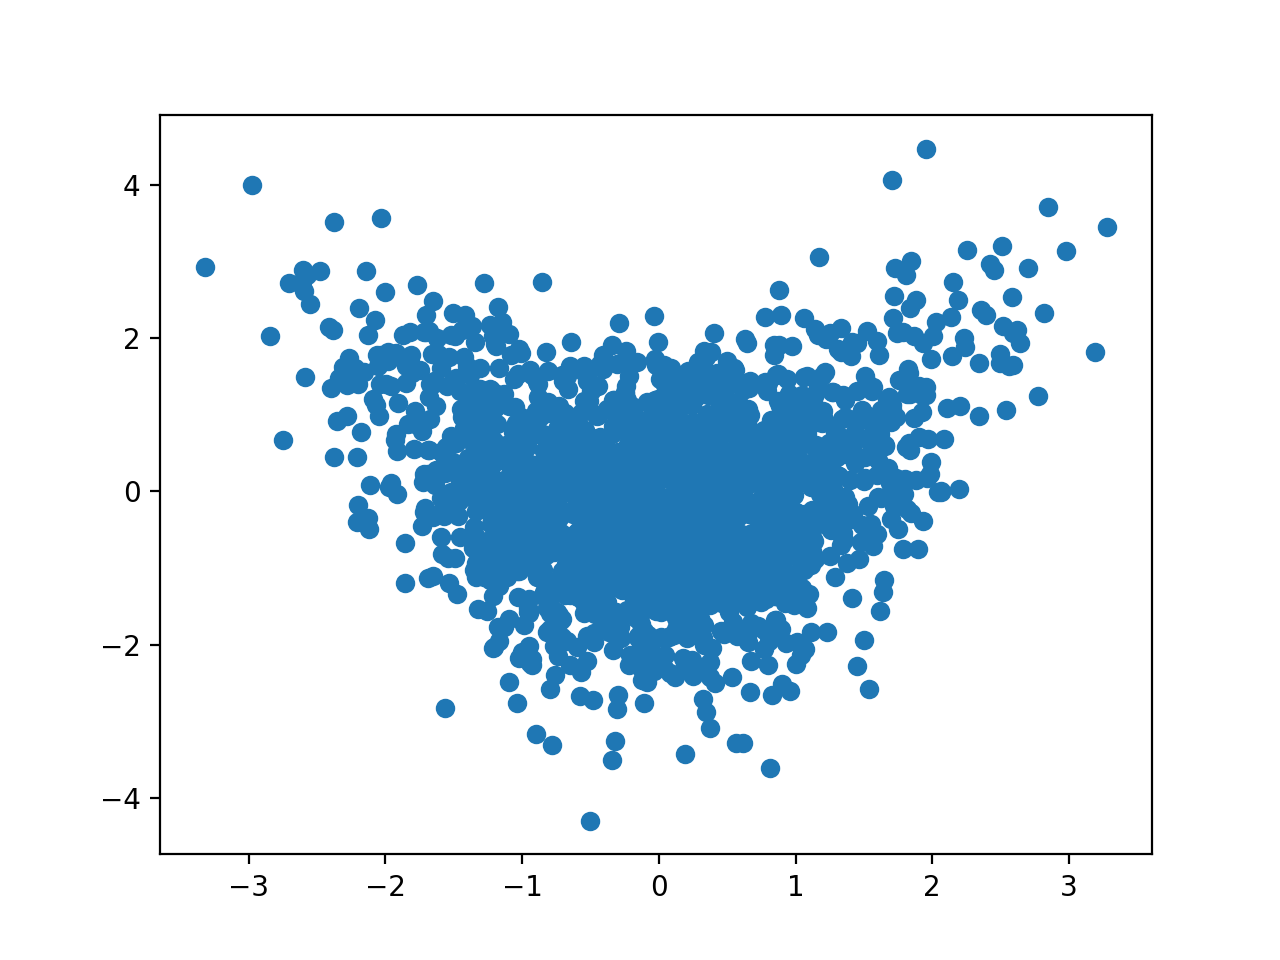

In [58]:
plt.scatter(X[:,0],X[:,1])

<IPython.core.display.Javascript object>


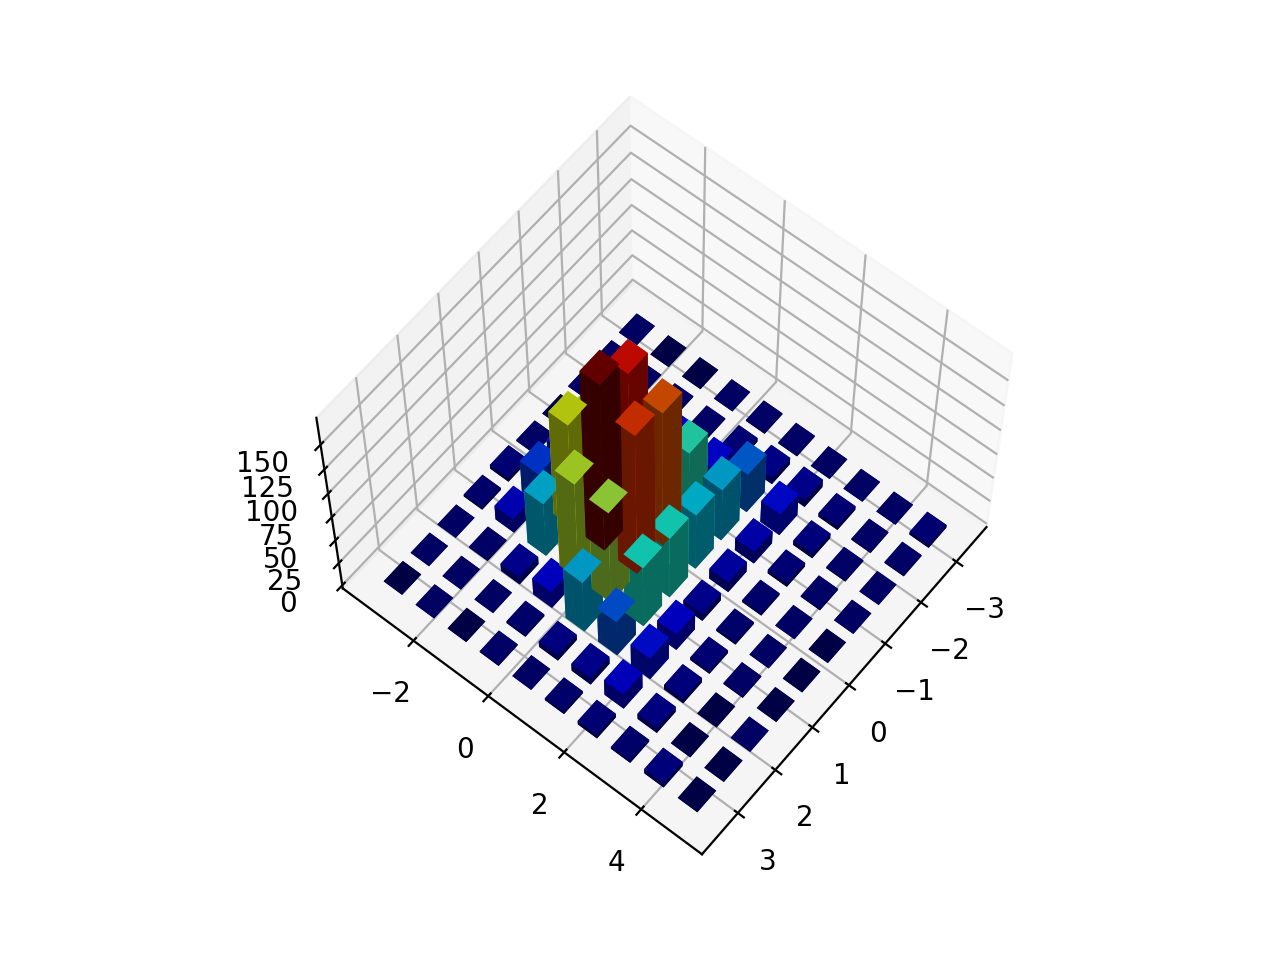

In [54]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(X[:,0],X[:,1], bins=10)


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

cmap = plt.cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color=rgba, zsort='average')

plt.show()

Pour mieux comprendre notre échantillonneur on peut le tester sur une densiter plus simple. 
Ici, on le test sur une gaussienne. 

In [44]:
def nu_density(x):
    d = x.shape[1]
    temp_x = np.copy(x)
    cov = np.eye(d)
    mu = np.ones(d)
    return multivariate_normal(mu, cov).pdf(temp_x)

In [45]:
sampler = ImportanceSampling()
sampler.train()
X = sampler.draw_x()

<IPython.core.display.Javascript object>


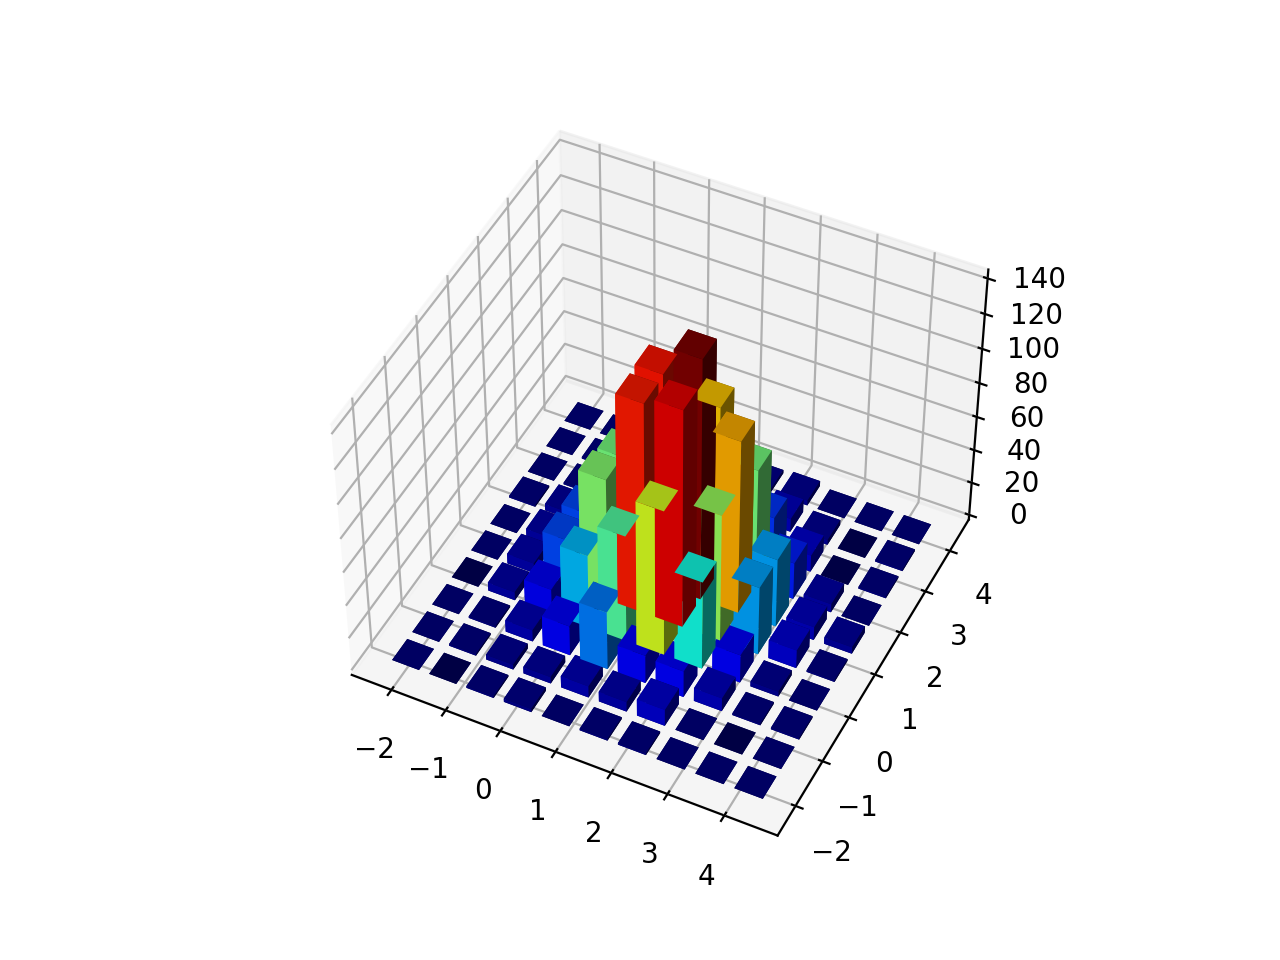

In [46]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(X[:,0],X[:,1], bins=10)


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

cmap = plt.cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color=rgba, zsort='average')

plt.show()